<a href="https://colab.research.google.com/github/Shrey0997/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

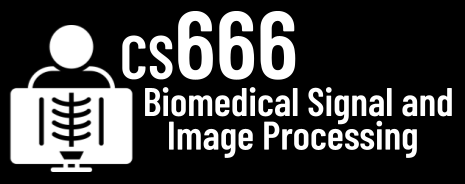

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 3.4 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [3]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

In [4]:
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

In [5]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

In [6]:
size(signal)/1000

15.0

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [7]:
SAMPLING_RATE = 1000 ### TODO!
SECONDS = 15 ### TODO!

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [8]:
from biosppy.signals import ecg

In [9]:
### TODO
process = ecg.ecg(signal=signal, sampling_rate=1000.0, path=None, show=False, interactive=True)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

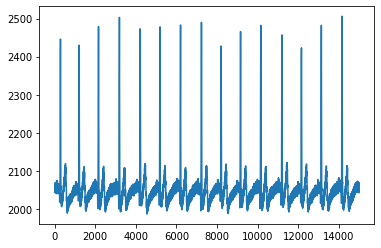

In [10]:
plot(signal)

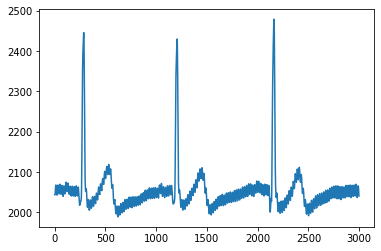

In [11]:
### TODO plot unfiltered signal
plot(signal[0:3*SAMPLING_RATE])

Here, we can spot 3 P, Q, R, S, T waves on the unfiltered signal.


*   The approximate points of P waves on the 'x-axis' of the graph are 100, 1050 and 2000.
*   The approximate points of Q waves on the 'x-axis' of the graph are 250, 1150 and 2100.
*   The approximate points of R waves on the 'x-axis' of the graph are 325, 1225 and 2175.
*   The approximate points of S waves on the 'x-axis' of the graph are 400, 1250 and 2250.
*   The approximate points of T waves on the 'x-axis' of the graph are 510, 1450 and 2400.
















In [12]:
(process['rpeaks'][0:3])

array([ 283, 1204, 2159])

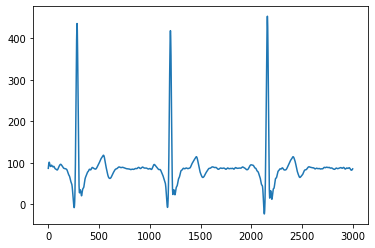

In [13]:
## TODO plot filtered signal
plot(process['filtered'][0:3*SAMPLING_RATE])

Here, we can spot 3 P, Q, R, S, T waves on the filtered signal.


*   The approximate points of P waves on the 'x-axis' of the graph are 100, 1050 and 2050.
*   The approximate points of Q waves on the 'x-axis' of the graph are 250, 1150 and 2100.
*   The approximate points of R waves on the 'x-axis' of the graph are 325, 1225 and 2150.
*   The approximate points of S waves on the 'x-axis' of the graph are 400, 1250 and 2200.
*   The approximate points of T waves on the 'x-axis' of the graph are 550, 1475 and 2400.










**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

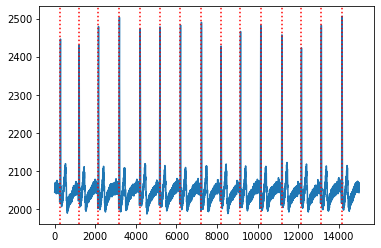

In [14]:
### TODO
plot(signal)
for x in process['rpeaks']:
  ###print(x)
  plt.axvline(x = x, color = 'r', ls=':')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [15]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.3 MB/s eta 0:00:00


*** ### Detecting Rpeaks using neurokit. ### ***

In [17]:
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=1000)

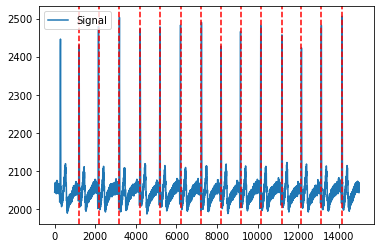

In [18]:
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], signal)

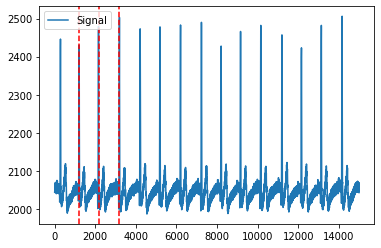

In [19]:
# Zooming into the first 3 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:3], signal[:18000])

**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [16]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

*   *** ### Detecting P Q S T waves now ### ***




/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


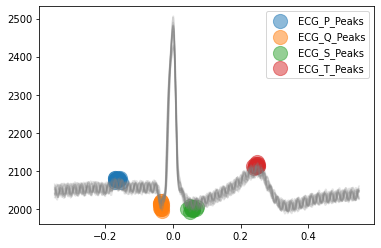

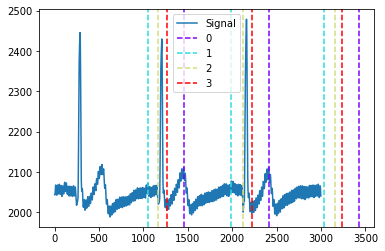

In [56]:
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak", show=True)
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], signal[:3*SAMPLING_RATE])

In [ ]:
# TODO Does the detection work well?
# Yes the detection works well.

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [20]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


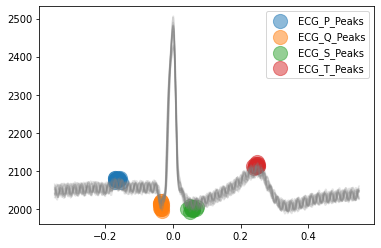

In [21]:
_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

array([2043.90831627, 2044.7889436 , 2045.84164268, ..., 2047.0291659 ,
       2044.748982  , 2042.6420801 ])

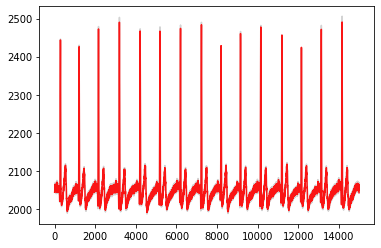

In [43]:
nk.signal_filter(signal, sampling_rate=1000, lowcut=0.0, highcut=60.0, method='butterworth', order=2, window_size='default', powerline=50,show=True)


*   The lowcut frequency that works well in this case is 0.0
*   The highcut frequency that works well in this case is 60.0



/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


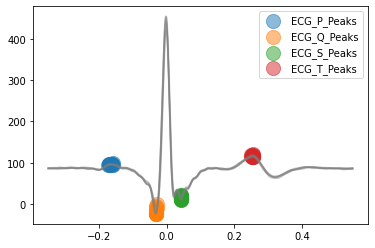

In [23]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak = nk.ecg_delineate(process['filtered'], 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:
# TODO Which one works the best?

# "Delineation on fitered signal from BioSPPY" works better since we can see much cleaner graph, and better understand the P, Q, S, T peak points. 

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#